In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_data_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_de = df[df["job_country"] == "Germany"].dropna(subset=["salary_year_avg"]).copy()
df_de.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1363,Data Scientist,Master Data Management Plants (f/m/div.),"Karlsruhe, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-08-18 13:27:39,False,False,Germany,year,56700.0,NaN,Bosch Group,[spark],{'libraries': ['spark']}
7772,Data Engineer,Research Engineer Bio-MEMS Sensors (f/m/div.),"Renningen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-25 13:14:38,False,False,Germany,year,199675.0,NaN,Bosch Group,[spark],{'libraries': ['spark']}
10610,Senior Data Engineer,"Senior Data Engineer - Infrastructure, TIDAL","Berlin, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-22 13:26:27,True,False,Germany,year,147500.0,NaN,Block,"[go, redshift, snowflake, aws, gdpr, hadoop, s...","{'cloud': ['redshift', 'snowflake', 'aws'], 'l..."
16764,Senior Data Analyst,Manager Data Strategy,"Frankfurt, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-06-15 13:35:03,False,False,Germany,year,72900.0,NaN,Publicis Groupe,None,None
20066,Data Analyst,Data Analyst Logistik (w/m/d),"Salzgitter, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-12-20 13:17:42,True,False,Germany,year,75067.5,NaN,PowerCo,"[r, python, java, c#, sql]","{'programming': ['r', 'python', 'java', 'c#', ..."


In [23]:
job_order = (df_de.groupby("job_title_short")["salary_year_avg"].median()
             .sort_values(ascending=False)
             .head(6)
             .index
             .to_list()
            )
job_order

['Senior Data Scientist',
 'Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Senior Data Analyst',
 'Data Analyst']

In [24]:
df_de_jobs = df_de[df_de["job_title_short"].isin(job_order)]
df_de_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1363,Data Scientist,Master Data Management Plants (f/m/div.),"Karlsruhe, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-08-18 13:27:39,False,False,Germany,year,56700.0,NaN,Bosch Group,[spark],{'libraries': ['spark']}
7772,Data Engineer,Research Engineer Bio-MEMS Sensors (f/m/div.),"Renningen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-25 13:14:38,False,False,Germany,year,199675.0,NaN,Bosch Group,[spark],{'libraries': ['spark']}
10610,Senior Data Engineer,"Senior Data Engineer - Infrastructure, TIDAL","Berlin, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-22 13:26:27,True,False,Germany,year,147500.0,NaN,Block,"[go, redshift, snowflake, aws, gdpr, hadoop, s...","{'cloud': ['redshift', 'snowflake', 'aws'], 'l..."
16764,Senior Data Analyst,Manager Data Strategy,"Frankfurt, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-06-15 13:35:03,False,False,Germany,year,72900.0,NaN,Publicis Groupe,None,None
20066,Data Analyst,Data Analyst Logistik (w/m/d),"Salzgitter, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-12-20 13:17:42,True,False,Germany,year,75067.5,NaN,PowerCo,"[r, python, java, c#, sql]","{'programming': ['r', 'python', 'java', 'c#', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775943,Senior Data Engineer,Senior Data Engineer (d/f/m),"Berlin, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-05-19 01:05:45,True,False,Germany,year,147500.0,NaN,Adevinta,"[aws, kafka, spark, zoom]","{'cloud': ['aws'], 'libraries': ['kafka', 'spa..."
781022,Senior Data Scientist,Streaming Content & Metadata Lead,"Berlin, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-28 06:18:41,True,False,Germany,year,80850.0,NaN,JustWatch,"[swift, sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
781105,Data Analyst,Data Analyst,"Munich, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-05 06:34:08,False,False,Germany,year,111175.0,NaN,Lilium,"[python, pyspark, terminal]","{'libraries': ['pyspark'], 'other': ['terminal..."
784053,Data Scientist,Working student for Data Science Approaches in...,"Reutlingen, Germany",via Ai-Jobs.net,Part-time,False,Germany,2023-02-28 06:13:26,False,False,Germany,year,56700.0,NaN,Bosch Group,[python],{'programming': ['python']}


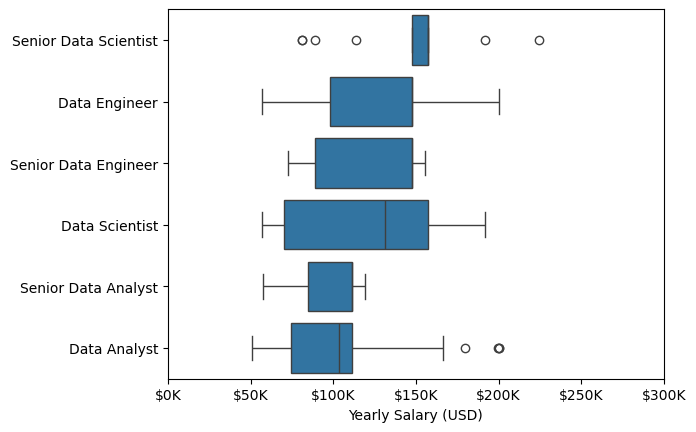

In [25]:
sns.boxplot(df_de_jobs, x="salary_year_avg", y="job_title_short", order=job_order)

ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda val, _: f"${int(val/1000)}K"))
plt.ylabel("")
plt.xlabel("Yearly Salary (USD)")
plt.xlim((0, 300_000))
plt.show()